<a href="https://colab.research.google.com/github/fjme95/aplicaciones-financieras/blob/main/Modulo%203/Semana%203/Black_Litterman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, FloatSlider

# Mean-Variance portfolio choice

Un valor libre de riesgo obtiene un rendimiento neto $r_f$ de un período.

Un vector de $n \times 1$ valores riesgosos gana un vector $\overrightarrow{r}-r_f\mathbb{1}$ de rendimientos en exceso, donde $\mathbb{1}$ es un vector de unos.

El vector de retorno en exceso es normal multivariante con media $\mu$ y matriz de covarianza $\Sigma$, que expresamos como

$$
\overrightarrow{r}-r_f\mathbb{1} \sim \mathcal{N}\left(\mu, \Sigma\right)
$$

o

$$
\overrightarrow{r}-r_f\mathbb{1} = \mu + C\epsilon
$$

donde $\epsilon$ en un vector aleatorio de $n\times 1$.

Sea $w$ un vector de $n\times 1$ pesos de cartera.

Una cartera compuesta por $w$ gana retornos 

$$
w'\left( \overrightarrow{r}-r_f\mathbb{1} \right) \sim \mathcal{N}\left(w'\mu, w'\Sigma w\right)
$$

El **problema de elección de cartera de media-varianza** consiste en elegir $w$ para maximizar la función de utilidad

\begin{align}
U\left(\mu, \Sigma; w\right) = w'\mu - \frac{\delta}{2}w'\Sigma w && (36.1)
\end{align}

donde $\delta > 0$ es un parámetro de aversión al riesgo. La condición de primer orden para maximizar (36.1) con respecto al vector $w$ es

$$
\mu = \delta \Sigma w
$$

lo que implica el siguiente diseño de una cartera riesgosa

\begin{align}
w = \left( \delta \Sigma\right)^{-1}\mu && (36.2)
\end{align}


#Estimando la medai y la varianza

Las entradas clave en el modelo de elección de cartera (36.2) son


*   estimaciones de los parámetros $\mu, \Sigma$ del vector de retorno de exceso aleatorio $\left( \overrightarrow{r}-r_f\mathbb{1} \right)$
*   el parámetro de aversión al riesgo $\delta$


Una forma estándar de estimar $\mu$ es la máxima verosimilitud o mínimos cuadrados; eso equivale a estimar mediante una media muestral de rendimientos en exceso y estimar $\Sigma$ con una matriz de covarianza muestral.

# Punto de inicio de Black-Litterman

Cuando las estimaciones de $\mu$ y $\Sigma$ a partir de medias y covarianzas de muestras históricas se han combinado con valores plausibles del parámetro de aversión al riesgo $\delta$ para calcular una cartera óptima a partir de la fórmula (36.2), se ha obtenido un resultado típico de $w$'s con posiciones largas y cortas extremas.

Una reacción común a estos resultados es que son tan inverosímiles que un administrador de cartera no puede recomendarlos a un cliente.

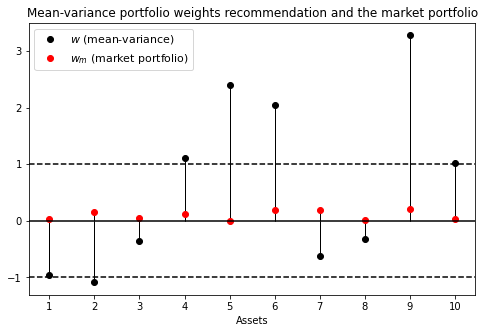

In [2]:
np.random.seed(12)

N = 10                                           # Number of assets
T = 200                                          # Sample size

# random market portfolio (sum is normalized to 1)
w_m = np.random.rand(N)
w_m = w_m / (w_m.sum())

# True risk premia and variance of excess return (constructed
# so that the Sharpe ratio is 1)
μ = (np.random.randn(N) + 5)  /100      # Mean excess return (risk premium)
S = np.random.randn(N, N)        # Random matrix for the covariance matrix
V = S @ S.T           # Turn the random matrix into symmetric psd
# Make sure that the Sharpe ratio is one
Σ = V * (w_m @ μ)**2 / (w_m @ V @ w_m)

# Risk aversion of market portfolio holder
δ = 1 / np.sqrt(w_m @ Σ @ w_m)

# Generate a sample of excess returns
excess_return = stat.multivariate_normal(μ, Σ)
sample = excess_return.rvs(T)

# Estimate μ and Σ
μ_est = sample.mean(0).reshape(N, 1)
Σ_est = np.cov(sample.T)

w = np.linalg.solve(δ * Σ_est, μ_est)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Mean-variance portfolio weights recommendation and the market portfolio')
ax.plot(np.arange(N)+1, w, 'o', c='k', label='$w$ (mean-variance)')
ax.plot(np.arange(N)+1, w_m, 'o', c='r', label='$w_m$ (market portfolio)')
ax.vlines(np.arange(N)+1, 0, w, lw=1)
ax.vlines(np.arange(N)+1, 0, w_m, lw=1)
ax.axhline(0, c='k')
ax.axhline(-1, c='k', ls='--')
ax.axhline(1, c='k', ls='--')
ax.set_xlabel('Assets')
ax.xaxis.set_ticks(np.arange(1, N+1, 1))
plt.legend(numpoints=1, fontsize=11)
plt.show()

Black y Litterman respondieron a esta situación de la siguiente manera:

*   Continúan aceptando (36.2) como un buen modelo para elegir una cartera óptima $w$,
*   Quieren seguir permitiendo que el cliente exprese su tolerancia al riesgo estableciendo $\delta$, 
*   Dejando $\Sigma$ en su valor de máxima verosimilitud, empujan $\mu$ lejos de su valor de máxima verosimilitud de una manera diseñada para hacer elecciones de cartera que sean más plausibles en términos de conformidad con lo que la mayoría de la gente realmente hace.

En particular, dada $\Sigma$ y un valor plausible de $\delta$, Black y Litterman aplicaron ingeniería inversa a un vector $\mu_{BL}$ de exceso de rendimiento medio que hace que $w$ dado por la fórmula (36.2) sea igual a la cartera de mercado real $w_m$, de modo que

$$
w_m = \left( \delta \Sigma\right)^{-1} \mu_{BL}
$$

# Detalles

Definamos

$$
w_m'\mu ≡\left( r_m - r_f\right)
$$

como el exceso de rendimiento (escalar) de la cartera de mercado $w_m$.

Define

$$
\sigma^2 = w_m'\Sigma w_m
$$

como la varianza del exceso de rendimiento de la cartera de mercado $w_m$.

Definir

$$
SR_m = \frac{r_m-r_f}{\sigma}
$$

como la razón de Sharpe sobre la cartera de mercado $w_m$.

Sea $\delta_m$ el valor del parámetro de aversión al riesgo que induce a un inversor a mantener la cartera de mercado a la luz de la regla de elección de cartera óptima (36.2).

Evidentemente, la regla de cartera (36.2) entonces implica que $r_m - r_f = \delta_m \sigma^2$ o

$$
\delta_m = \frac{r_m-r_f}{\sigma^2}
$$

o

$$
\delta_m = \frac{SR_M}{\sigma}
$$

Siguiendo la filosofía Black-Litterman, nuestro primer paso será apostar por un valor de $\delta_m$ desde

*    una estimación de la relación de Sharpe, y
*    nuestra estimación de máxima verosimilitud de $\sigma$ extraída de nuestras estimaciones o $w_m$ y $\Sigma$.

El segundo paso clave de Black-Litterman es usar este valor de $\delta$ junto con la estimación de máxima verosimilitud de $\Sigma$ para deducir un $\mu_{BL}$ que verifica la regla de cartera (36.2) en la cartera de mercado $w=w_m$

$$
\mu_m = \delta_m \Sigma \mu_m
$$

El punto de partida del modelo de elección de cartera de Black-Litterman es, por lo tanto, un par $\left( \delta_m, \mu_m \right)$ que le dice al cliente que mantenga la cartera de mercado.

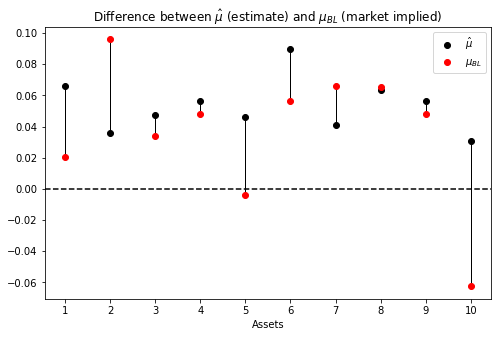

In [3]:
# Observed mean excess market return
r_m = w_m @ μ_est

# Estimated variance of the market portfolio
σ_m = w_m @ Σ_est @ w_m

# Sharpe-ratio
sr_m = r_m / np.sqrt(σ_m)

# Risk aversion of market portfolio holder
d_m = r_m / σ_m

# Derive "view" which would induce the market portfolio
μ_m = (d_m * Σ_est @ w_m).reshape(N, 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title(r'Difference between $\hat{\mu}$ (estimate) and $\mu_{BL}$ (market implied)')
ax.plot(np.arange(N)+1, μ_est, 'o', c='k', label='$\hat{\mu}$')
ax.plot(np.arange(N)+1, μ_m, 'o', c='r', label='$\mu_{BL}$')
ax.vlines(np.arange(N) + 1, μ_m, μ_est, lw=1)
ax.axhline(0, c='k', ls='--')
ax.set_xlabel('Assets')
ax.xaxis.set_ticks(np.arange(1, N+1, 1))
plt.legend(numpoints=1)
plt.show()

# Agregando vistas

Black y Litterman comienzan con un cliente de referencia que afirma que comparte las opiniones del mercado, lo que significa que cree que el exceso de rendimiento se rige por

\begin{align}
\overrightarrow{r}-r_f\mathbb{1} \sim \mathcal{N}\left(\mu_{BL}, \Sigma\right)&&(36.3)
\end{align}

Black y Litterman aconsejarían a ese cliente que mantuviera la cartera de mercado de valores riesgosos.

Black y Litterman luego imaginan un consumidor al que le gustaría expresar una opinión diferente a la del mercado.

El consumidor quiere mezclar apropiadamente su punto de vista con el del mercado antes de usar (36.2) para elegir una cartera.

Suponga que la opinión del cliente está expresada por una corazonada de que, en lugar de (36.3), los rendimientos excesivos se rigen por

$$
\overrightarrow{r}-r_f\mathbb{1} \sim \mathcal{N}\left(\hat{\mu}, \tau\Sigma\right)
$$

donde $\tau > 0$ es un parámetro escalar que determina cómo el tomador de decisiones quiere mezclar su visión con la visión del mercado $\mu_{BL}$.

Black y Litterman luego usarían una fórmula como la siguiente para mezclar las vistas $\hat{\mu}$ y $\mu_{BL}$ 

\begin{align}
\tilde{\mu} = \left( \Sigma^{-1} + \left( \tau \Sigma\right)^{-1}\right)^{-1} \left( \Sigma^{-1} \mu_{BL} + \left( \tau \Sigma\right)^{-1}\hat{\mu} \right) &&(36.4)
\end{align}


Black y Litterman aconsejarían entonces al cliente que mantuviera la cartera asociada con estos puntos de vista implícitos en la regla (36.2):

$$
\tilde{w} = \left( \delta \Sigma\right)^{-1}\tilde{\mu}
$$

Esta cartera $\tilde{\mu}$ se desviará de la cartera $\mu_{BL}$ en cantidades que dependen del parámetro de mezcla $\tau$.

Si $\hat{\mu}$ es el estimador de máxima verosimilitud y $\tau$ se elige en gran medida para ponderar esta vista, entonces la cartera del cliente implicará grandes posiciones cortas y largas.

In [5]:
def black_litterman(λ, μ1, μ2, Σ1, Σ2):
    """
    This function calculates the Black-Litterman mixture
    mean excess return and covariance matrix
    """
    Σ1_inv = np.linalg.inv(Σ1)
    Σ2_inv = np.linalg.inv(Σ2)

    μ_tilde = np.linalg.solve(Σ1_inv + λ * Σ2_inv,
                              Σ1_inv @ μ1 + λ * Σ2_inv @ μ2)
    return μ_tilde

τ = 1
μ_tilde = black_litterman(1, μ_m, μ_est, Σ_est, τ * Σ_est)

# The Black-Litterman recommendation for the portfolio weights
w_tilde = np.linalg.solve(δ * Σ_est, μ_tilde)

τ_slider = FloatSlider(min=0.05, max=10, step=0.5, value=τ)

@interact(τ=τ_slider)
def BL_plot(τ):
    μ_tilde = black_litterman(1, μ_m, μ_est, Σ_est, τ * Σ_est)
    w_tilde = np.linalg.solve(δ * Σ_est, μ_tilde)

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(np.arange(N)+1, μ_est, 'o', c='k',
               label=r'$\hat{\mu}$ (subj view)')
    ax[0].plot(np.arange(N)+1, μ_m, 'o', c='r',
               label=r'$\mu_{BL}$ (market)')
    ax[0].plot(np.arange(N)+1, μ_tilde, 'o', c='y',
               label=r'$\tilde{\mu}$ (mixture)')
    ax[0].vlines(np.arange(N)+1, μ_m, μ_est, lw=1)
    ax[0].axhline(0, c='k', ls='--')
    ax[0].set(xlim=(0, N+1), xlabel='Assets',
              title=r'Relationship between $\hat{\mu}$, $\mu_{BL}$, and  $ \tilde{\mu}$')
    ax[0].xaxis.set_ticks(np.arange(1, N+1, 1))
    ax[0].legend(numpoints=1)

    ax[1].set_title('Black-Litterman portfolio weight recommendation')
    ax[1].plot(np.arange(N)+1, w, 'o', c='k', label=r'$w$ (mean-variance)')
    ax[1].plot(np.arange(N)+1, w_m, 'o', c='r', label=r'$w_{m}$ (market, BL)')
    ax[1].plot(np.arange(N)+1, w_tilde, 'o', c='y',
               label=r'$\tilde{w}$ (mixture)')
    ax[1].vlines(np.arange(N)+1, 0, w, lw=1)
    ax[1].vlines(np.arange(N)+1, 0, w_m, lw=1)
    ax[1].axhline(0, c='k')
    ax[1].axhline(-1, c='k', ls='--')
    ax[1].axhline(1, c='k', ls='--')
    ax[1].set(xlim=(0, N+1), xlabel='Assets',
              title='Black-Litterman portfolio weight recommendation')
    ax[1].xaxis.set_ticks(np.arange(1, N+1, 1))
    ax[1].legend(numpoints=1)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='τ', max=10.0, min=0.05, step=0.5), Output()), _dom_c…

- Traducido de https://python-advanced.quantecon.org/black_litterman.html